In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
company_data=pd.read_csv("E:\\data science\\assiments\\14\\Company_Data.csv")

In [3]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company_data = pd.get_dummies(company_data, columns = ['ShelveLoc','Urban','US'])

In [5]:
company_data["sales"]="small"
company_data.loc[company_data["Sales"]>7,"sales"]="large"
company_data.drop(["Sales"],axis=1,inplace=True)

In [6]:
(company_data)

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,large
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,large
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,large
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,large
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,large
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,small
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,large
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,small


In [7]:
x = company_data.iloc[:,0:14]
y = company_data.iloc[:,14]

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, stratify = y)

In [9]:
y_train.value_counts()

large    173
small    147
Name: sales, dtype: int64

### Building Decision Tree Classifier using Entropy Criteria

In [10]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

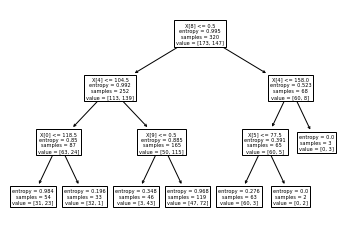

In [11]:
tree.plot_tree(model);

In [12]:
company_data.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes', 'sales'],
      dtype='object')

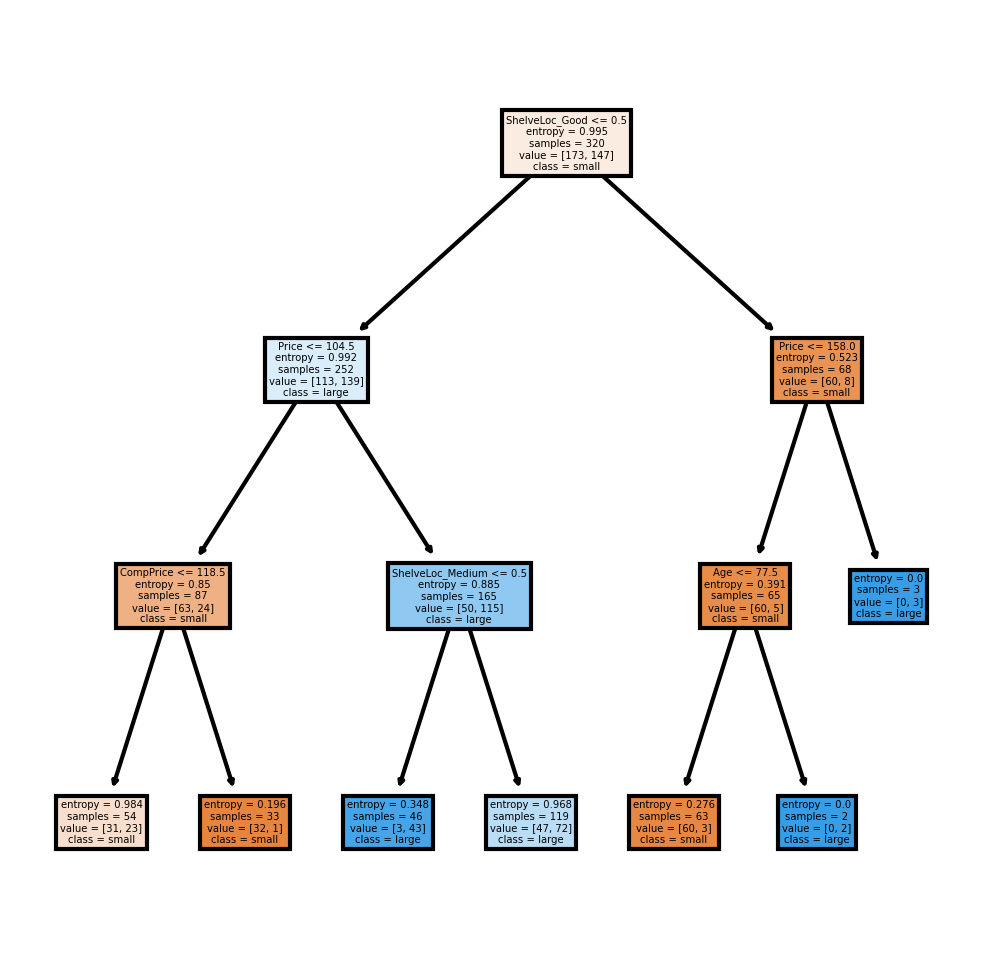

In [13]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes',]
cn=['small','large']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [14]:
pred_train = model.predict(x_train)

In [15]:
accuracy_score(y_train,pred_train)

0.759375

In [16]:
pred_test = model.predict(x_test)

In [17]:
accuracy_score(y_test,pred_test)

0.7375

In [18]:
confusion_matrix(y_test,pred_test)

array([[28, 15],
       [ 6, 31]], dtype=int64)

### Building Decision Tree Classifier (CART) using Gini Criteria

In [19]:
model2 = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [20]:
model2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

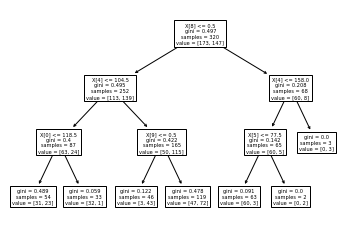

In [21]:
tree.plot_tree(model2);

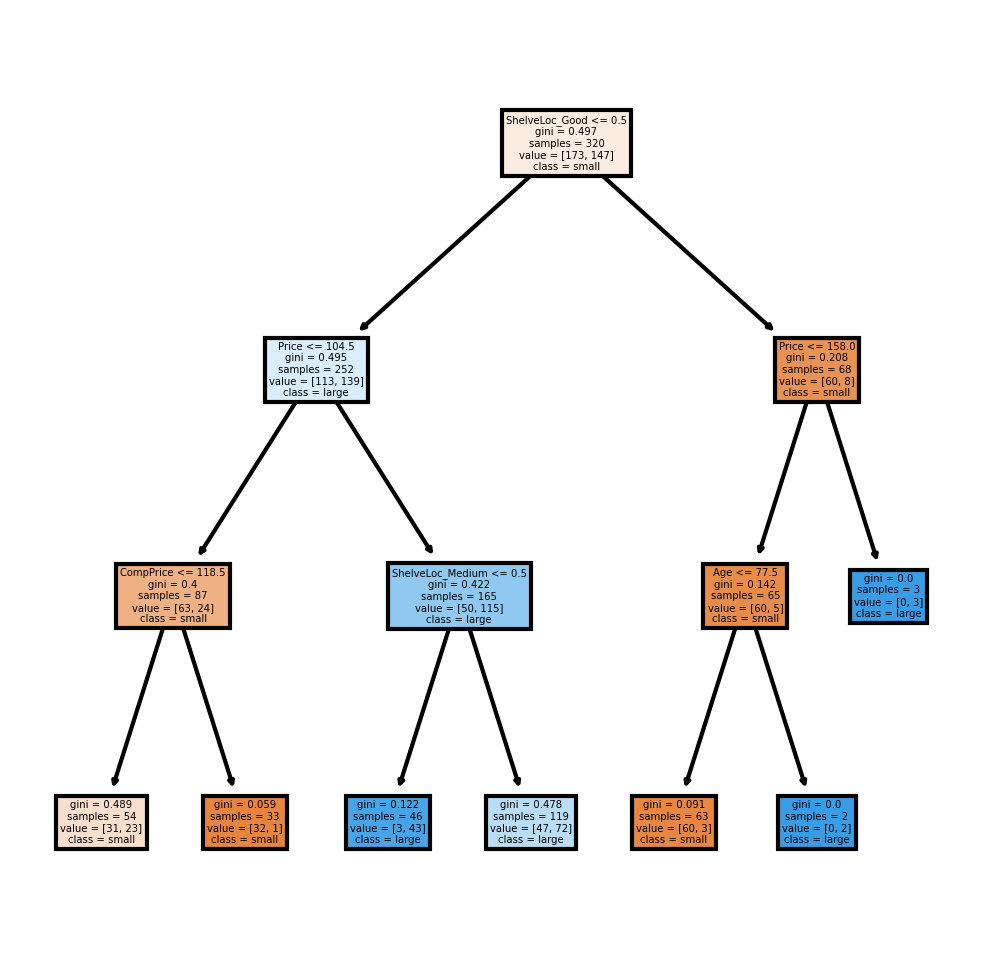

In [22]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes',]
cn=['small','large']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [23]:
pred_train_gini = model2.predict(x_train)

In [24]:
accuracy_score(y_train,pred_train_gini)

0.759375

In [25]:
pred_test_gini = model2.predict(x_test)

In [26]:
accuracy_score(y_test,pred_test_gini)

0.7375

In [27]:
confusion_matrix(y_test,pred_test_gini)

array([[28, 15],
       [ 6, 31]], dtype=int64)